In [35]:
### Import Packages
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt

In [3]:
chunksize = 10**6

In [64]:
rt = pd.read_table("./Inputs/Cleaned/df.csv", chunksize = chunksize,  sep = ",", low_memory = False)

/Users/analuizapessoa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [11]:
df = pd.concat(rt,ignore_index = True)

In [12]:
df.head()

,GENDER,AGE,EMPLOYMENT,INCOME,FREQUENCY_VISIT,HOW_DO_YOU_ENJOY_STARBUCKS,TIME_PER_VISIT,DISTANCE_TO_NEAREST_STORE,MEMBER,SPEND_PER_VISIT,...,FG_jawschip,FG_juices,FG_never,FG_pastries,FG_sandwiches,FG_DIGITAL_MEDIA,FG_STARBUCKS_WEBSITE,FG_EMAIL,FG_FRIENDS,FG_FISIC
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Less than RM20,...,0,0,0,0,0,1,1,1,0,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Less than RM20,...,0,0,0,1,0,1,0,0,0,1
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Less than RM20,...,0,0,0,0,0,0,0,0,0,1
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,...,0,0,0,0,0,0,0,0,1,0
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Around RM20 - RM40,...,0,0,0,0,1,1,1,0,0,0


In [13]:
pd.set_option('display.float_format', lambda x: '%.5f'% x)

In [15]:
df.reset_index(drop = True, inplace = True)

In [16]:
df.columns

Index(['GENDER', 'AGE', 'EMPLOYMENT', 'INCOME', 'FREQUENCY_VISIT',
       'HOW_DO_YOU_ENJOY_STARBUCKS', 'TIME_PER_VISIT',
       'DISTANCE_TO_NEAREST_STORE', 'MEMBER', 'SPEND_PER_VISIT', 'QUALITY_EV',
       'PRICE_EV', 'PROMOTIONS_EV', 'AMBIANCE_EV', 'WIFI_EV', 'SERVICE_EV',
       'BUSINESS_OR_FRIENDS', 'POTENTIAL_CLIENT', 'FG_cake', 'FG_coffee',
       'FG_colddrinks', 'FG_jawschip', 'FG_juices', 'FG_never', 'FG_pastries',
       'FG_sandwiches', 'FG_DIGITAL_MEDIA', 'FG_STARBUCKS_WEBSITE', 'FG_EMAIL',
       'FG_FRIENDS', 'FG_FISIC'],
      dtype='object')

In [25]:
### normalize numerical inputs
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df[['QUALITY_EV',
       'PRICE_EV', 'PROMOTIONS_EV', 'AMBIANCE_EV', 'WIFI_EV', 'SERVICE_EV']].values)
df[['QUALITY_EV',
       'PRICE_EV', 'PROMOTIONS_EV', 'AMBIANCE_EV', 'WIFI_EV', 'SERVICE_EV']] = pd.DataFrame(x_scaled)

In [54]:
### Finding the optimal number of cluster  
## colocar um erro para nao convergencia
start_time = time.time()
kp_cost = []
K = list(range(1, 40)) ## number of clusters
for k in K:
    try:
        kp = KPrototypes(n_clusters=k, init='Huang', n_init=1, verbose=False)
        kp.fit_predict(df, categorical=[0,1,2,3,4,5,6,7,8,9,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
        kp_cost.append(kp.cost_)
    except:
        print("---cluster =  %s did not converge"% k)
        K.pop(k - 1)
print("--- %s seconds ---" % (time.time() - start_time))

---cluster =  39 did not converge
--- 14.419448852539062 seconds ---


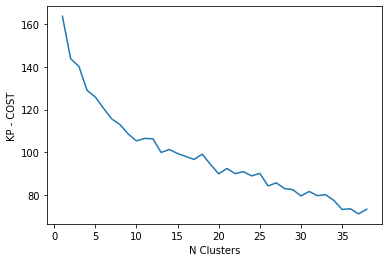

In [56]:
## Find the elbow
plt.plot(K, kp_cost)
plt.ylabel('KP - COST')
plt.xlabel('N Clusters')
plt.show()

In [ ]:
### running the modelwith 10 clusters (hugest change in the slope)

In [57]:
start_time = time.time()
kp = KPrototypes(n_clusters=10, init='Huang', n_init=3, verbose=True)
kp.fit_predict(df, categorical=[0,1,2,3,4,5,6,7,8,9,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print("--- %s seconds ---" % (time.time() - start_time))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 37, ncost: 114.30395757023238
Run: 1, iteration: 2/100, moves: 19, ncost: 110.57445053456328
Run: 1, iteration: 3/100, moves: 5, ncost: 109.90442848550892
Run: 1, iteration: 4/100, moves: 0, ncost: 109.90442848550892
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 44, ncost: 117.12756789528
Run: 2, iteration: 2/100, moves: 22, ncost: 113.810044841372
Run: 2, iteration: 3/100, moves: 3, ncost: 113.21562148879326
Run: 2, iteration: 4/100, moves: 8, ncost: 111.9334685431357
Run: 2, iteration: 5/100, moves: 5, ncost: 110.91761092379018
Run: 2, iteration: 6/100, moves: 4, ncost: 110.61648326170449
Run: 2, iteration: 7/100, moves: 2, ncost: 110.32113556694301
Run: 2, iteration: 8/100, moves: 2, ncost: 109.95142171098679
Run: 2, iteration: 9/100, moves: 0, ncost: 109.95142171098679
Init: initializing centroids
Init: i

In [66]:
Labels = kp.labels_

In [60]:
#### Store the model binary for future usage
with open('./Outputs/Binaries/kprototypes.pickle', 'wb') as f:
    pickle.dump(kp, f)

In [63]:
### de normalize the data set to retrieve full output
rt = pd.read_table("./Inputs/Cleaned/df.csv", chunksize = chunksize,  sep = ",", low_memory = False)

/Users/analuizapessoa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [65]:
df_final = pd.concat(rt,ignore_index = True)

In [67]:
df_final['Labels'] = Labels

In [69]:
df_final.to_csv('./Outputs/modelv1.csv', index = False)